# Effects of Trip characteristics on their Duration
## By Ajayi Temiloluwa

<p>In this section of this project, an explanatory data analysis is conducted on the Ford GoBike dataset.

<p>Ford GoBike is a regional public bike sharing system in the San Francisco Bay Area, California. The dataset used for this explanatory analysis consists of monthly individual trip data from February, 2019 in CSV format covering the greater San Francisco Bay area.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
sb.set_style('darkgrid') 

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_trip_df_clean = pd.read_csv('ford_data_clean.csv')
ford_trip_df_clean

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,...,duration_minutes,rider's_age,rider's_age_group,duration_hour_group,start_hour,start_day,start_month,end_hour,end_day,end_month
0,0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,...,869,35,Young_adults,btw_12_and_16_hours,17,Thursday,February,8,Friday,March
1,2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),...,1030,47,Middle_age_adults,btw_16_and_20_hours,12,Thursday,February,5,Friday,March
2,3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,...,608,30,Young_adults,btw_8_and_12_hours,17,Thursday,February,4,Friday,March
3,4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,...,26,45,Young_adults,Less_than_4_hours,23,Thursday,February,0,Friday,March
4,5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,...,29,60,Middle_age_adults,Less_than_4_hours,23,Thursday,February,0,Friday,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),...,8,23,Young_adults,Less_than_4_hours,0,Friday,February,0,Friday,February
174948,183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,...,5,35,Young_adults,Less_than_4_hours,0,Friday,February,0,Friday,February
174949,183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,...,2,29,Young_adults,Less_than_4_hours,0,Friday,February,0,Friday,February
174950,183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,...,2,31,Young_adults,Less_than_4_hours,0,Friday,February,0,Friday,February


## Distribution of Trip Duration in minutes and Rider's age.
The trip duration in minutes takes a scale between 1 and 1409 minutes, with most of the values between 2 and 20, there was a need to specify new bins. The distribution is right skewed and takes a unimodal shape.

The age of the rider takes a scale between 18 and 141 yrs, with most of the values between 20 and 45, there was a need to specify new bins. The distribution is right skewed and takes a unimodal shape.

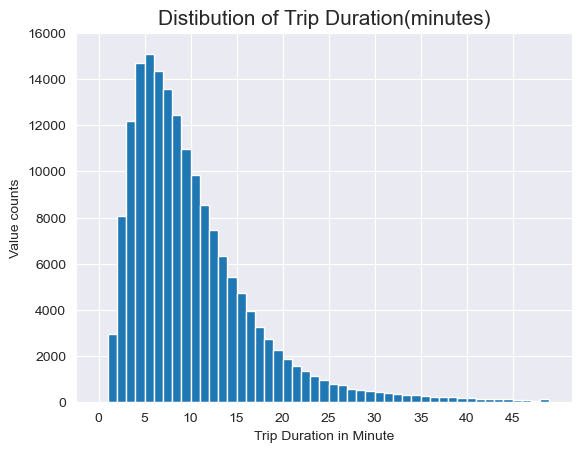

In [3]:
bins = np.arange(0, 50, 1)
yticks = np.arange(0, 18000, 2000)
ticks = np.arange(0, 50, 5)
plt.hist(data=ford_trip_df_clean, x='duration_minutes', bins=bins);
plt.ylabel("Value counts")
plt.title('Distibution of Trip Duration(minutes)', fontsize=15)
plt.yticks(yticks, yticks)
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');




## Distribution of Trip Duration in Rider's age.

The age of the rider takes a scale between 18 and 141 yrs, with most of the values between 20 and 45, there was a need to specify new bins. The distribution is right skewed and takes a unimodal shape.

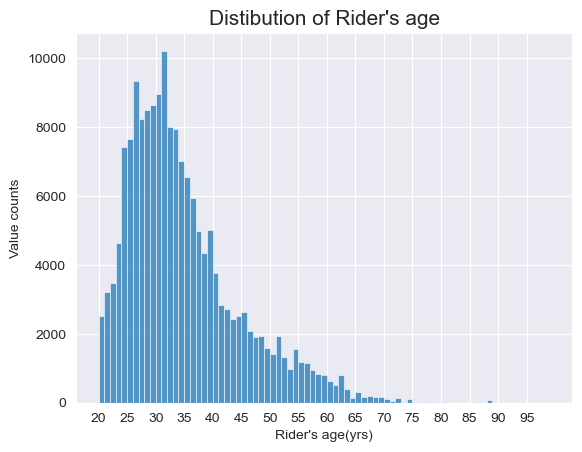

In [4]:
bins = np.arange(20, 100, 1)
ticks = np.arange(20, 100, 5)
yticks =np.arange(0,14000, 2000)
plt.yticks(yticks, yticks)
plt.xticks(ticks, ticks);
plt.xlabel("Rider's age(yrs)")
plt.ylabel("Value counts")
plt.title('Distibution of Rider\'s age', fontsize=15)
sb.histplot(data=ford_trip_df_clean, x="rider's_age", bins=bins);

## Distribution of member gender.

74.6% of the bike users are male users, 23.2% are female and the other 2% chose others.

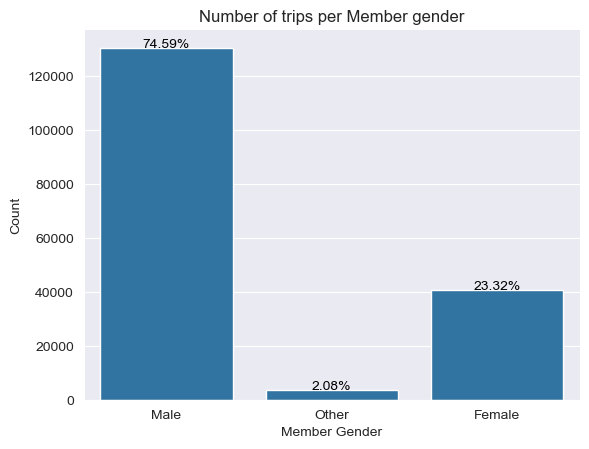

In [5]:
sb.set_style('darkgrid') # set grid color

# plotting the chart
sb.countplot(data=ford_trip_df_clean, x="member_gender", color = sb.color_palette()[0])
gender_count = ford_trip_df_clean['member_gender'].value_counts()
num_of_trips = ford_trip_df_clean['member_gender'].value_counts().sum()
#Get the current tick locations and labels
locs, labels = plt.xticks(rotation = 0)
for loc, labels in zip(locs, labels):
    counts = gender_count[labels.get_text()]
    pct_string = '{:.2f}%'.format(100*counts/num_of_trips)
    plt.text(loc, counts+2, pct_string, ha='center', color='black')
yticks =np.arange(0,140000, 20000)
plt.yticks(yticks, yticks)
plt.title('Number of trips per Member gender')
plt.xlabel('Member Gender')
plt.ylabel('Count')

# removing the right and top borders of the axes
sb.despine()

plt.show()

## Distribution of User types.
90.5% of the users were subscribers, while only 9.5% were customers(one-off users.

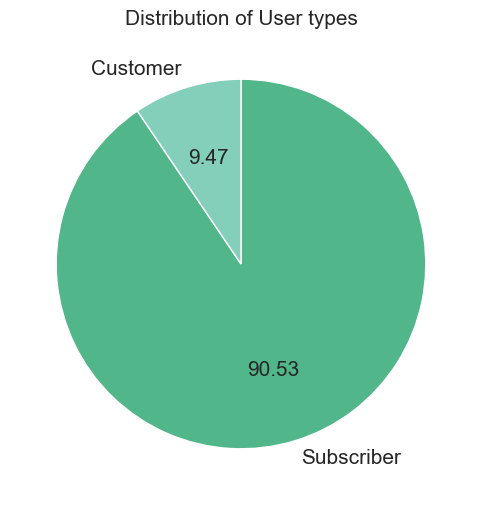

In [6]:
user_type = ford_trip_df_clean['user_type'].value_counts()
sb.color_palette()[0]
plt.figure(figsize=[6,6])
plt.title('Distribution of User types', fontsize = 15)
plt.pie(user_type, startangle = 90, labels=user_type.index, autopct='%.2f', counterclock = False, textprops={'fontsize': 15}, colors = sb.color_palette('BuGn_r')[2:4]);


## Distribution of User types

Week days (between Monday and Friday) activities are high with the highest number of trips in a being on Thursday(19.3% of the weekly trips). A total of 16.5% of the trips were made on weekends(sunday and saturday). This reflects that most of the trips were made for Schooling and Working purposes and only a little made for recreational purposes.

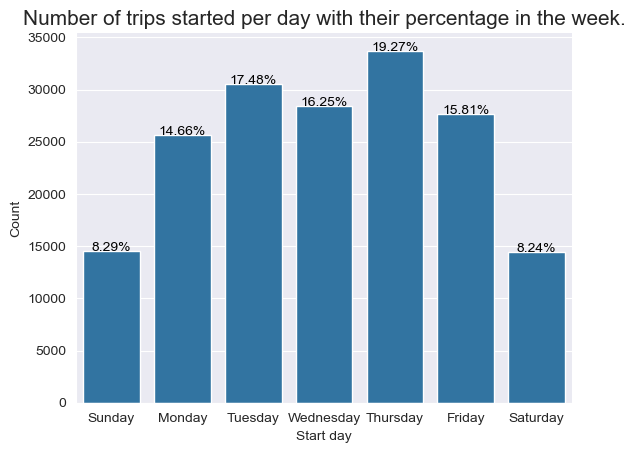

In [7]:
sb.set_style('darkgrid') # set grid color

# plotting the chart
order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sb.countplot(data=ford_trip_df_clean, x="start_day", order = order, color = sb.color_palette()[0])
start_day_count = ford_trip_df_clean['start_day'].value_counts()
num_of_trips = ford_trip_df_clean['start_day'].value_counts().sum()
#Get the current tick locations and labels
locs, labels = plt.xticks(rotation = 0)
for loc, labels in zip(locs, labels):
    counts = start_day_count[labels.get_text()]
    pct_string = '{:.2f}%'.format(100*counts/num_of_trips)
    plt.text(loc, counts+2, pct_string , ha='center', color='black')
plt.title('Number of trips started per day with their percentage in the week.', fontsize = 15)

plt.xlabel('Start day')
plt.ylabel('Count')
sb.despine()

plt.show()



##  Average Trip duration for each day

Despite fewer trips were made on weekends, trips made on weekends were longer as most probably they were enjoyed or uses as exercises. 
During weekdays, riders ride for a shorter time to a more define location like school and workplace.

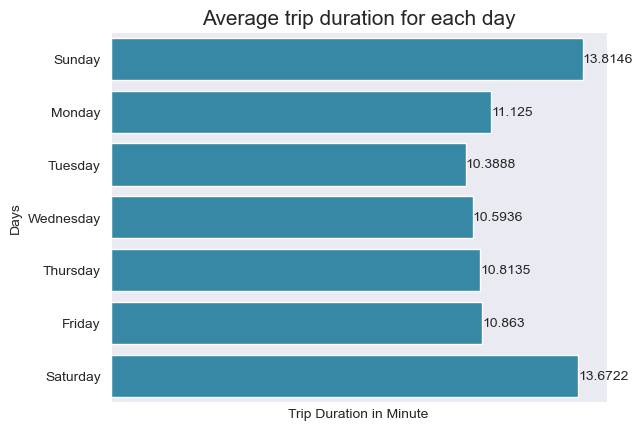

In [8]:
ax = sb.barplot(data = ford_trip_df_clean, y='start_day',x='duration_minutes', color =  sb.color_palette('ocean_r')[1], ci=None ,order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] )
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Days')
plt.title('Average trip duration for each day', fontsize = 15)
plt.xticks([])
ax.bar_label(ax.containers[0])
plt.show()

## Average trip duration per day for each gender
For each day, the duration of trip for each gender group were compared. It can be noticed that those in the otherd group rode longer with an average of 23 minutes on Sundays. Females also ride for a longer time when compared to males.
All gender ride for a longer time during weekends.

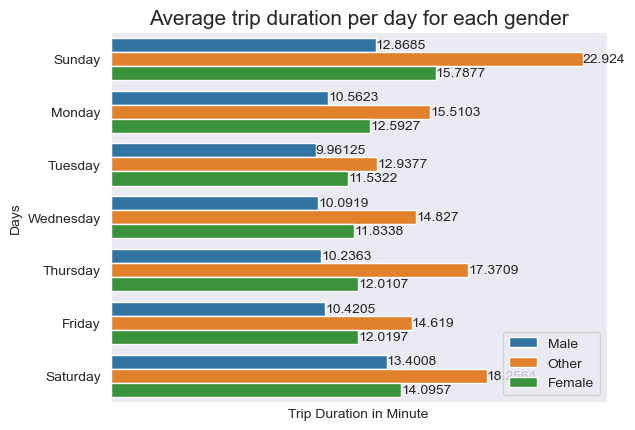

In [9]:
ax = sb.barplot(data = ford_trip_df_clean, y='start_day',x='duration_minutes', hue = 'member_gender', ci=None, order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] )
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Days')
plt.legend()
plt.title('Average trip duration per day for each gender', fontsize = 15)
plt.xticks([])
for i in ax.containers:
    
    ax.bar_label(i,)

plt.show()

## Average Trip Duration in Minute for each user type 
Costumers generally ride for a far longer time when compare to subscribers. Probably, this is due to the fact that costumer ride occasionally during weekdays.

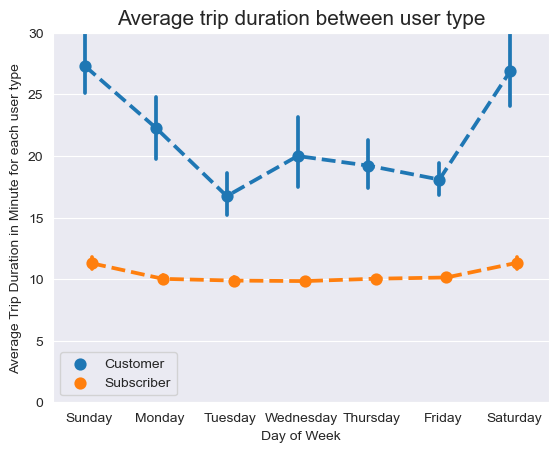

In [10]:
bins = np.arange(0, 30, 2.5)
sb.pointplot(data=ford_trip_df_clean, x='start_day', y='duration_minutes', hue='user_type', dodge=0.1, linestyles='dashed', bins =bins, order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']);
plt.xlabel('Day of Week');
plt.ylim([0,30])
yticks = np.arange(0, 35, 5)
plt.yticks(yticks, yticks)
plt.legend()
plt.ylabel('Average Trip Duration in Minute for each user type');
plt.title('Average trip duration between user type', fontsize=15)
plt.show()

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt